<a href="https://colab.research.google.com/github/RidmaTabassum/Assignment-1/blob/main/qs_3_hw_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/20
235/235 [==============================] - 7s 24ms/step - loss: 0.0770 - val_loss: 0.0664
Epoch 2/20
235/235 [==============================] - 4s 19ms/step - loss: 0.0619 - val_loss: 0.0561
Epoch 3/20
235/235 [==============================] - 5s 23ms/step - loss: 0.0546 - val_loss: 0.0530
Epoch 4/20
235/235 [==============================] - 5s 20ms/step - loss: 0.0521 - val_loss: 0.0508
Epoch 5/20
235/235 [==============================] - 4s 19ms/step - loss: 0.0503 - val_loss: 0.0495
Epoch 6/20
235/235 [==============================] - 6s 24ms/step - loss: 0.0491 - val_loss: 0.0487
Epoch 7/20
235/235 [==============================] - 4s 19ms/step - loss: 0.0482 - val_loss: 0.0478
Epoch 8/20
235/235 [==============================] - 4s 19ms/step - loss: 0.0474 - val_loss: 0.0471
Epoch 9/20
235/235 [==============================] - 6s 24ms/step - loss: 0.0468 - val_loss: 0.0465
Epoch 10/20
235/235 [==============================] - 5s 19ms/step - loss: 0.0463 - val_lo

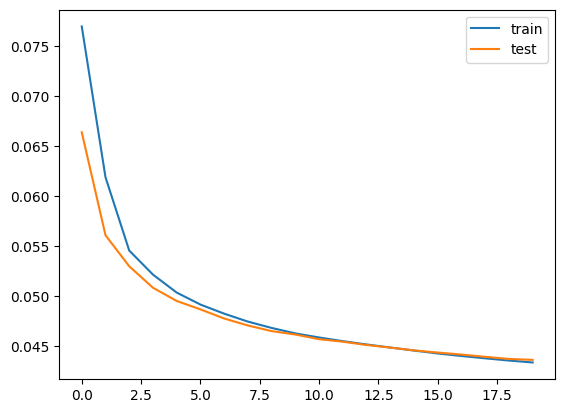

1/1 [==============================] - 0s 30ms/step


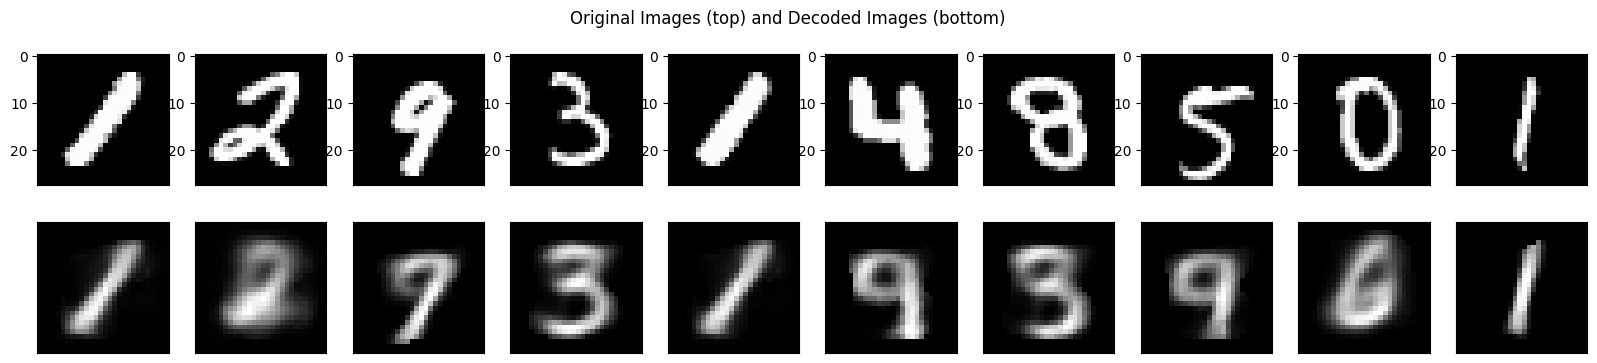

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt


# Load the MNIST dataset and normalize the pixel values
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# Define the architecture of the autoencoder
input_dim = 784 # 28*28 pixels
encoding_dim = 2 # bottleneck layer with two neurons
hidden_dim = 256 # number of neurons in hidden layer

input_layer = tf.keras.layers.Input(shape=input_dim,)
hidden_layer = tf.keras.layers.Dense(hidden_dim, activation='relu')(input_layer)
encoding_layer = tf.keras.layers.Dense(encoding_dim, activation='relu')(hidden_layer)
decoding_layer = tf.keras.layers.Dense(hidden_dim, activation='relu')(encoding_layer)
output_layer = tf.keras.layers.Dense(input_dim, activation='sigmoid')(decoding_layer)

autoencoder_model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

# Compile the model and define the loss function and optimizer
autoencoder_model.compile(optimizer='adam', loss='mse')


# Train the model on the MNIST dataset
history = autoencoder_model.fit(x_train, x_train,
                                epochs=20,
                                batch_size=256,
                                shuffle=True,
                                validation_data=(x_test, x_test))

# Plot the train and test loss to monitor how well your model is learning.
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


# Randomly select 10 images from the test set
num_images = 10
random_test_images = np.random.randint(x_test.shape[0], size=num_images)

# Encode and decode the selected images using the autoencoder model


encoded_imgs = encoder_model.predict(x_test[random_test_images])
decoded_imgs = decoder_model.predict(encoded_imgs)
plt.figure(figsize=(20, 4))
for i, image_idx in enumerate(random_test_images):
    # Display original image
    ax = plt.subplot(2, num_images, i + 1)
    plt.imshow(x_test[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    # Display reconstructed image
    ax = plt.subplot(2, num_images, i + 1 + num_images)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.suptitle('Original Images (top) and Decoded Images (bottom)')
plt.show()
